In [6]:
import numpy as np
import sys
sys.path.append("..")
from models import knn

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
threeNN = knn.KNearestNeighbours(k=3)

In [8]:
#%load_ext autoreload
import sys
sys.path.append("..")
from data_processing.train_test_split import train_test_split
iris_X = iris['data']
iris_y = iris['target']
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, seed=345)
print(iris_X_train.shape)
print(iris_X_test.shape)
print(iris_y_train.shape)
print(iris_y_test.shape)

(113, 4)
(37, 4)
(113,)
(37,)


In [9]:
threeNN.fit(iris_X_train, iris_y_train)
pred_threeNN = threeNN.predict(iris_X_test)
print(pred_threeNN == iris_y_test)
accuracy = np.mean(pred_threeNN == iris_y_test)
error = 1 - accuracy
print("Accuracy: ", accuracy)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True]
Accuracy:  0.972972972972973


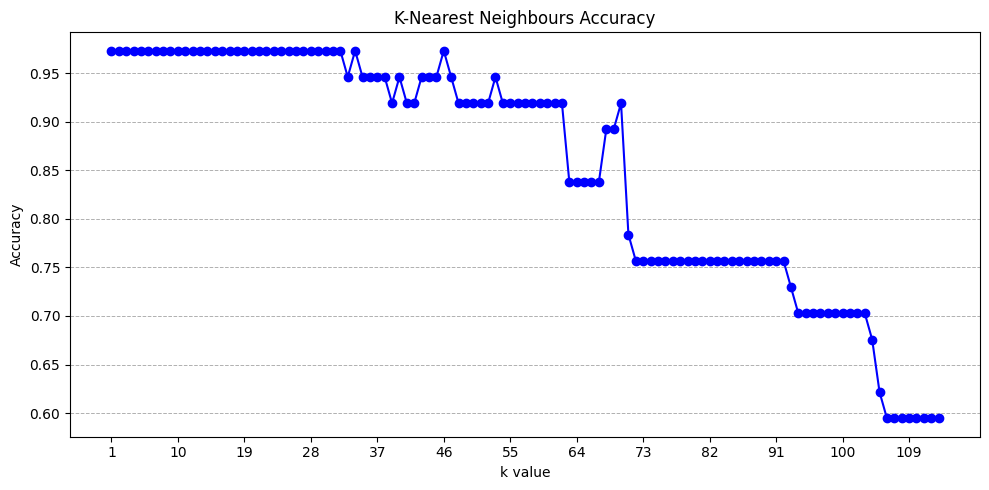

In [10]:
import matplotlib.pyplot as plt
iris_accuracy = []
for n in range(1, len(iris_X_train) + 1):
    iris_knn = knn.KNearestNeighbours(k=n)
    # Pass the correct training labels
    iris_knn.fit(iris_X_train, iris_y_train)
    pred_iris_knn = iris_knn.predict(iris_X_test)
    knn_accuracy = np.mean(pred_iris_knn == iris_y_test)
    iris_accuracy.append(knn_accuracy)
#print(iris_accuracy)
k_values = list(range(1, len(iris_accuracy) + 1))

plt.figure(figsize=(10, 5))
plt.plot(k_values, iris_accuracy, marker='o', linestyle='-', color='b',markersize=6)
plt.title('K-Nearest Neighbours Accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.xticks(k_values[::9])  # Ensure that only integer k values are used as x-ticks
plt.grid(True,which='both', axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


In [11]:
iono = np.genfromtxt("../datasets/ionosphere.txt")
X_io = np.genfromtxt("../datasets/ionosphere.txt", delimiter=",", usecols=np.arange(34))
y_io = np.genfromtxt("../datasets/ionosphere.txt", delimiter=",", usecols=34, dtype="int")

print(X_io.shape)

X_train_io, X_test_io, y_train_io, y_test_io = train_test_split(X_io, y_io, seed=2108)
print("Training set size: ", X_train_io.shape[0])
print("Test set size: ", X_test_io.shape[0])


(351, 34)
Training set size:  264
Test set size:  87


In [12]:
knn_iono_five = knn.KNearestNeighbours(5)
knn_iono_five.fit(X_train_io,y_train_io)
predictions_iono_five = knn_iono_five.predict(X_test_io)
accuracy_iono_five = np.mean(predictions_iono_five == y_test_io)
print("Accuracy :", accuracy_iono_five)



Accuracy : 0.8735632183908046


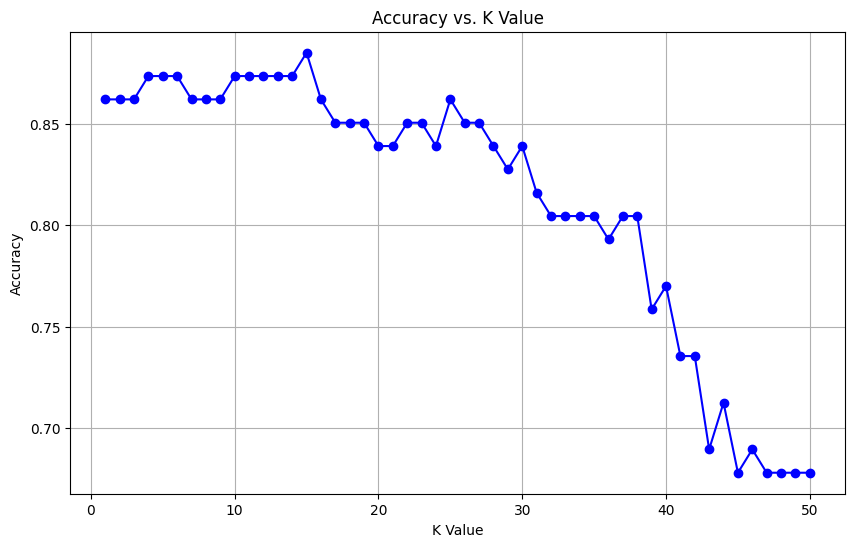

In [13]:
accuracies = []

for k in range(1, 51):
    knn_model = knn.KNearestNeighbours(k)
    knn_model.fit(X_train_io, y_train_io)
    predictions = knn_model.predict(X_test_io)
    accuracy = np.mean(predictions == y_test_io)
    accuracies.append(accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()